<a href="https://colab.research.google.com/github/hyeonu96/first-repository/blob/main/MINI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5) # 이 두줄은 본 필자가 항상 쓰는 방법입니다. matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [21]:
df_train = pd.read_csv('/content/drive/MyDrive/aiffel/mini/train.csv')

df_train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


 Null data check 결측치 확인


In [22]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column:         id	 Percent of NaN value: 0.00%
column:       hour	 Percent of NaN value: 0.00%
column: hour_bef_temperature	 Percent of NaN value: 0.14%
column: hour_bef_precipitation	 Percent of NaN value: 0.14%
column: hour_bef_windspeed	 Percent of NaN value: 0.62%
column: hour_bef_humidity	 Percent of NaN value: 0.14%
column: hour_bef_visibility	 Percent of NaN value: 0.14%
column: hour_bef_ozone	 Percent of NaN value: 5.21%
column: hour_bef_pm10	 Percent of NaN value: 6.17%
column: hour_bef_pm2.5	 Percent of NaN value: 8.02%
column:      count	 Percent of NaN value: 0.00%


In [28]:
df_train.isnull()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1454,False,False,False,False,False,False,False,False,False,False,False
1455,False,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,False


In [80]:
df_train.fillna(0,inplace = True)
df_train.head(10)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
5,13,2,13.6,0.0,1.7,80.0,1073.0,0.027,34.0,15.0,39.0
6,14,3,10.6,0.0,1.5,58.0,1548.0,0.038,62.0,33.0,23.0
7,16,21,16.0,0.0,6.0,21.0,1961.0,0.050,90.0,28.0,146.0
8,19,9,13.8,0.0,1.9,64.0,1344.0,0.039,93.0,19.0,39.0
9,20,14,17.2,0.0,2.1,32.0,1571.0,0.025,64.0,19.0,83.0


시간에 따른 미세먼지와의 관계.

미세먼지와 오존

미세먼지와 기온

미세먼지와 풍속



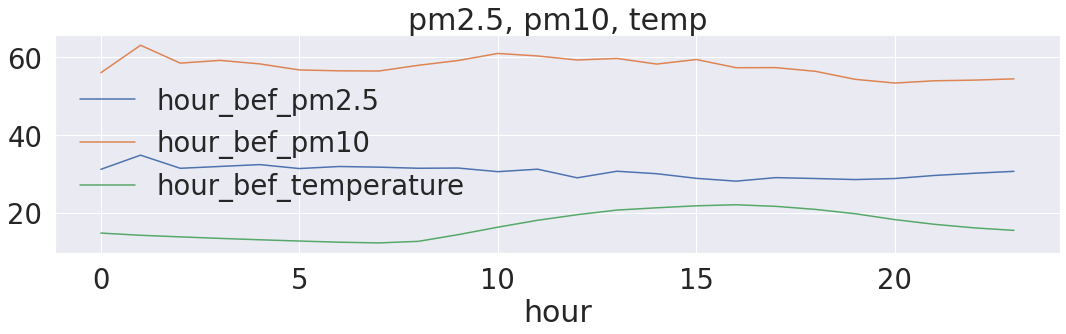

In [86]:
(df_train.groupby(['hour'])['hour_bef_pm2.5'].mean()).plot(figsize=(18, 4))
(df_train.groupby(['hour'])['hour_bef_pm10'].mean()).plot(figsize=(18, 4))
(df_train.groupby(['hour'])['hour_bef_temperature'].mean()).plot(figsize=(18, 4))
plt.legend(['hour_bef_pm2.5', 'hour_bef_pm10', 'hour_bef_temperature'])
plt.title('pm2.5, pm10, temp')
plt.show()

시간에 따른 기온과 미세지수2.5의 그래프이다.

0-3시 사이에 높은 미세먼지를 보이지만 기온은 높지도 낮지도 않는 모습이다.

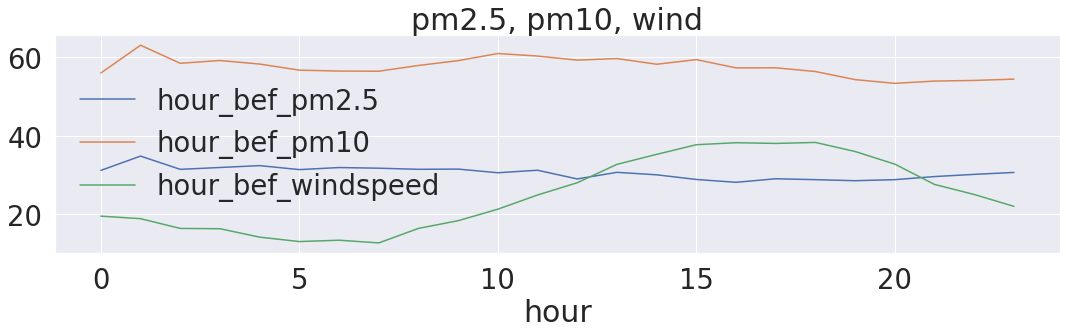

In [87]:
(df_train.groupby(['hour'])['hour_bef_pm2.5'].mean()).plot(figsize=(18, 4))
(df_train.groupby(['hour'])['hour_bef_pm10'].mean()).plot(figsize=(18, 4))
(df_train.groupby(['hour'])['hour_bef_windspeed'].mean()*10).plot(figsize=(18, 4))
plt.legend(['hour_bef_pm2.5','hour_bef_pm10', 'hour_bef_windspeed'])
plt.title('pm2.5, pm10, wind')
plt.show()

시간에 따른 풍속과 미세먼지2.5의 그래프이다.

관련이 없는 거 같은 그래프의 모습이다.

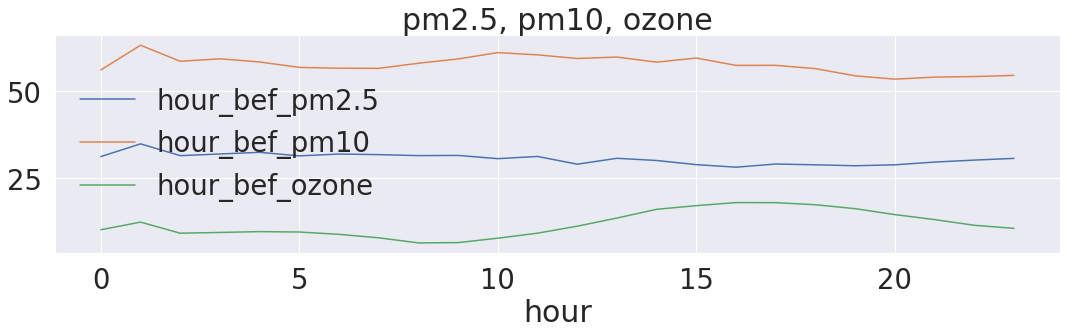

In [89]:
(df_train.groupby(['hour'])['hour_bef_pm2.5'].mean()).plot(figsize=(18, 4))
(df_train.groupby(['hour'])['hour_bef_pm10'].mean()).plot(figsize=(18, 4))
(df_train.groupby(['hour'])['hour_bef_ozone'].mean()*300).plot(figsize=(18, 4))
plt.legend(['hour_bef_pm2.5', 'hour_bef_pm10', 'hour_bef_ozone'])
plt.title('pm2.5, pm10, ozone')
plt.show()

시간에 따른 미세먼지와 오존의 그래프